# Decision-making and experiments

## Setup modules and R support

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from functools import partial
from progressbar import progressbar
from scipy import stats
import statsmodels.stats.power as power
from functools import partial
import matplotlib.pyplot as plt
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [ ]:
!apt-get update
!apt-get install r-base
!pip install rpy2==2.8.6

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [973 kB]
Get:15 http://arch

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('pwr')
library(pwr)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/pwr_1.2-2.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  length 93810 bytes (91 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-pa

In [ ]:
from rpy2.robjects.packages import importr
from rpy2.robjects import rinterface
pwr = importr('pwr')

In [ ]:
def pwr_2p(p1, p2, n=None, 
             alternative="two.sided",
             sig_level=None,
             power=None,
             verbose=False
  ):
  """
  Two-proportion, equal sample size power calculation from R's pwr.
  
  Docs:
  https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html
  """
  h = pwr.ES_h(p1 = p1, p2 = p2)#prob from treatment and control
  
  r = pwr.pwr_2p_test(
    h=h,
    n=n or rinterface.NULL,#equal size groups
    alternative=alternative,
    power=power or rinterface.NULL,
    sig_level=sig_level or rinterface.NULL
  )#give you back
  if verbose:
    print(r)
  keys = ['h', 'n', 'power', 'alternative']
  output = {k: r.rx(k)[0][0] for k in keys}
  output['p1'] = p1
  output['p2'] = p2
  output['sig_level'] = r.rx('sig.level')[0][0]
  return output #all output of function
  

In [ ]:
# Example output
pwr_2p(p1=0.55, p2=0.50, n=100, sig_level=0.01, verbose=True)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1001674
              n = 100
      sig.level = 0.01
          power = 0.03142471
    alternative = two.sided

NOTE: same sample sizes




{'alternative': 'two.sided',
 'h': 0.10016742116155974,
 'n': 100,
 'p1': 0.55,
 'p2': 0.5,
 'power': 0.03142470742395835,
 'sig_level': 0.01}

## Exercises

### In-class warm-up (20 points)

1. Suppose that currently our donation website has a conversion rate of 0.50 (50 percent). We are testing a simpler UI that we think will increase conversion. The minimum improvement that we care about is 0.005 percentage points (a 1% relative increase). Our site gets 200k visitors per week. For a simple A/B test with $\alpha=0.05$ and power = 0.80, how many visitors do we need? How long should our experiment run? How many visitors do we need if we want power = 0.95?

2. Suppose we suspect that our site has strong weekly variation in conversion rates. The weekdays and weekends are very different. We want our experiment's sample to be representative of the actual proportions of weekday and weekend visitors. How long do we need to run our experiment (power=0.8)?

### "Power analysis with expected utility" section

#### In-class (30 points)

3. In the section "Power analysis with expected utility", we examined a simple economic model of an experiment. In this case should we run the experiment?

4. **Approximately**, what is the minimum sample size where the experiment would be worthwhile to run?

5. Use the experiment parameters from the notes. Suppose we could reduce the fixed cost of the experiment. **Approximately** where do we need to get the cost to in order to justify the experiment?

6. Use the experiment parameters from the notes. Suppose we came to believe that there is a smaller chance that the null hypothesis is true. At **approximately** what P(null hypothesis) would we become willing to do the experiment?


#### Homework (20 points)

Show the answers to both of the following questions on a graph of the experiment's utility.

7. Suppose that we have a more effective version of the new product. If it works, it will boost conversion from 0.50 to 0.52 and deliver an additional 1.2M in revenue (rather than conversion of 0.51 and 1.1M in additional revenue). We also believe it is more likely to be effective, so the probability that the null hypothesis is true is 0.2. Otherwise this scenario is the same as in the notebook. What is the optimal $\alpha$ to choose (out of the ones we checked in the notebook)?

8. In the previous problem, for what ranges of $\alpha$ would be willing to run the experiment?

### Section "Multiple treatments" (in-class, 30 points)

8. Get the function `stats_prop_test` from the lecture 3 notebook. Copy it into your problem set. Adapt it so that you can do a one-sided test. You should only need to change 1 or 2 lines. Do some tests and show that it is giving you answer that makes sense. (Hint: Which of group 1 and group 2 will you treat as the control group?)

9. Repeat the analysis in the notebook comparing N=200 vs. N=1000. However, we will change the decision function. Let's consider the first column in each data frame to be the control group. We will pick the arm with the highest conversion rate (in the data) **but only** if it is statistically significantly better than the "control group". Use your function from problem 8. Plot the performance. How do these results compare to the results in the notebook? Why do you think this is?

10. Let's modify the N=200 experiment scenario above. Suppose that for each percentage point of conversion we earn 1M dollars of profit. Suppose that for each arm we test there is a cost of 20k that represents the engineering and development costs of preparing the arm for the experiment. What is the optimal number of arms to run in this experiment to maximize profit (assuming the other parameters are as before)? Plot your answer in a graph.

### Decision strategies (homework, bonus +20 points)

In the "Decision strategies" notebook we simulated the performance of various decision rules in different data-generating processes.

- What tends to cause null hypothesis significance testing (NHST) to perform worse than flipping a coin?
- Is NHST really that bad? When would you **want** to use it?
- In the slides I showed you a case where the optimal Bayesian decision strategy has a type I error rate of nearly 100%. Why is that?
- In the last question, how can the optimal Bayesian have the highest performance (in terms of conversion) but also have a nearly 100% type I error rate?



#Warm - Up
##1

In [ ]:
pwr_2p(p1=0.505, p2=0.50, alternative="greater", sig_level=0.05, power = .8, verbose=True)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01000017
              n = 123647
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: same sample sizes




{'alternative': 'greater',
 'h': 0.010000166674166922,
 'n': 123647.02285314057,
 'p1': 0.505,
 'p2': 0.5,
 'power': 0.8,
 'sig_level': 0.05}

In [ ]:
#n = 123647

In [ ]:
pwr_2p(p1=0.505, p2=0.50, alternative="two.sided", sig_level=0.05, power = .8, verbose=True)['n']
sample_size = pwr_2p(p1=0.505, p2=0.50, alternative="two.sided", sig_level=0.05, power = .8, verbose=True)['n'] *2
sample_size


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01000017
              n = 156972
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: same sample sizes



     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01000017
              n = 156972
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: same sample sizes




313943.9550152732

In [ ]:
exp_duration = sample_size*7/200000
round(exp_duration)
#4 days

11

In [ ]:
import math
print("Visitors (power = 0.95) =", math.ceil(pwr_2p(p1=0.505, p2=0.50, alternative="two.sided", sig_level=0.05, power = .95, verbose=True)['n']))


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01000017
              n = 259885.5
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: same sample sizes


Visitors (power = 0.95) = 259886


##2

In [ ]:
exp_duration = pwr_2p(p1=0.505, p2=0.50, alternative="two.sided", sig_level=0.05, power = .8, verbose=True)['n']*2*7/200000
exp_duration
#5.5 days is 6 days


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01000017
              n = 156972
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: same sample sizes




10.98803842553456

(-0.025, 1.025)

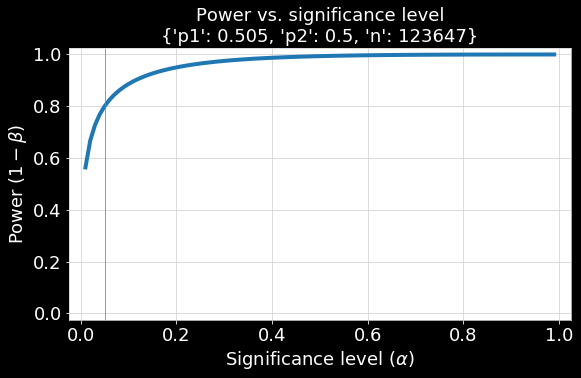

In [ ]:
params = dict(p1=0.505, p2=0.50, n=123647)
alphas = np.arange(0.01, 1, 0.01)
df_power_two = pd.DataFrame([
    pwr_2p(**params, sig_level=alpha, alternative="greater")
    for alpha in alphas
])
ax = df_power_two.plot(x='sig_level', y='power', figsize=(9, 5), linewidth=4, legend=False)
ax.set_xlabel(r"Significance level $(\alpha)$", fontsize=18)
ax.set_ylabel(r"Power $(1 - \beta)$", fontsize=18)
ax.set_title("Power vs. significance level\n{}".format(params), color='white', fontsize=18)
ax.tick_params(labelsize=18)
ax.axvline(0.05, color='grey', alpha=0.8, linewidth=1)
#power_at_05 = df_power_two.query("sig_level == 0.05")['power'].values[0]
#ax.axhline(power_at_05, color='grey', alpha=0.8, linewidth=1)
ax.grid()
ax.set_xlim(-0.025, 1.025)
ax.set_ylim(-0.025, 1.025)

In [ ]:
df_power_two

,alternative,h,n,p1,p2,power,sig_level
0,greater,0.01,123647,0.505,0.5,0.563609,0.01
1,greater,0.01,123647,0.505,0.5,0.667393,0.02
2,greater,0.01,123647,0.505,0.5,0.727637,0.03
3,greater,0.01,123647,0.505,0.5,0.769070,0.04
4,greater,0.01,123647,0.505,0.5,0.800000,0.05
5,greater,0.01,123647,0.505,0.5,0.824254,0.06
6,greater,0.01,123647,0.505,0.5,0.843916,0.07
7,greater,0.01,123647,0.505,0.5,0.860241,0.08
8,greater,0.01,123647,0.505,0.5,0.874044,0.09
9,greater,0.01,123647,0.505,0.5,0.885883,0.10


We could round up to 14 days. We do it as weekly means by week. That is why, the duration has to be a multiple of 7. As we have 11 days for experiment, and conversions' behavior is different on weekdays and weekends, 14 days are the duration of that experiment.

#"Power analysis with expected utility" section

##3

In the section "Power analysis with expected utility", we examined a simple economic model of an experiment. In this case should we run the experiment?

We should not run this experiment as we have seen that this experiment has negative and downsloping utility function. It means that we should abandon this experiment

##4

Approximately, what is the minimum sample size where the experiment would be worthwhile to run?

(-0.025, 1.025)

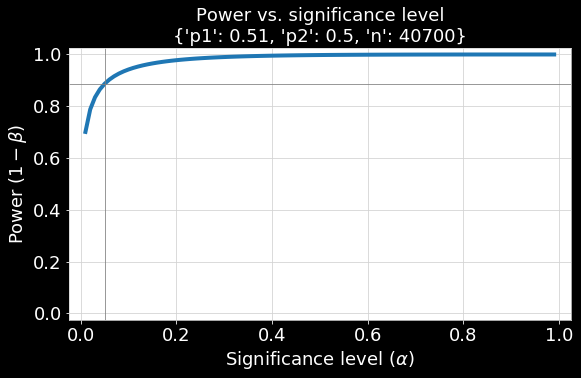

In [ ]:
# The `n` here is the sample size **per group**! Overall N is 2n.
params = dict(p1=0.51, p2=0.50, n=40700)
alphas = np.arange(0.01, 1, 0.01)
df_power_greater = pd.DataFrame([
    pwr_2p(**params, sig_level=alpha, alternative="greater")
    for alpha in alphas
])
ax = df_power_greater.plot(x='sig_level', y='power', figsize=(9, 5), linewidth=4, legend=False)
ax.set_xlabel(r"Significance level $(\alpha)$", fontsize=18)
ax.set_ylabel(r"Power $(1 - \beta)$", fontsize=18)
ax.set_title("Power vs. significance level\n{}".format(params), color='white', fontsize=18)
ax.tick_params(labelsize=18)
ax.axvline(0.05, color='grey', alpha=0.8, linewidth=1)
power_at_05 = df_power_greater.query("sig_level == 0.05")['power'].values[0]
ax.axhline(power_at_05, color='grey', alpha=0.8, linewidth=1)
ax.grid()
ax.set_xlim(-0.025, 1.025)
ax.set_ylim(-0.025, 1.025)

In [ ]:
def eu(sig_level, power):
  alpha = sig_level
  experiment_cost = 30000  # fixed cost of experiment
  p_null_hypo = 0.5  # probability that null hypothesis is true
  u_fp = -1 * (10 ** 6)  # utility of false positive
  u_tp = 1 * (10 ** 5)  # utility of true positive
  # Calculate the utility of doing the experiment.
  # The utility of not doing the experiment is zero.
  u_experiment = u_fp * alpha * p_null_hypo + u_tp * power * (1 - p_null_hypo) - experiment_cost
  return {'u_experiment': u_experiment, 'alpha': alpha, 'power': power}

df_utility = df_power_greater[['sig_level', 'power']].apply(lambda row: eu(**row), axis=1, result_type='expand')

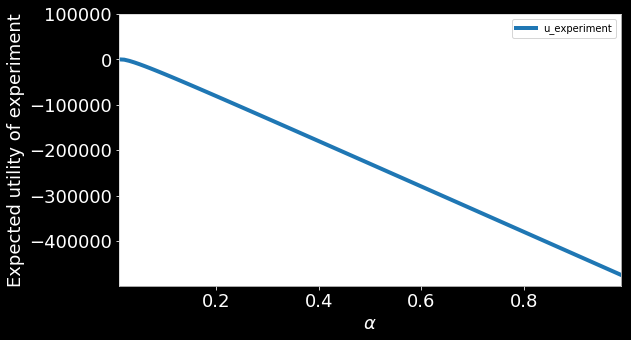

In [ ]:
ax = df_utility.plot(x='alpha', y='u_experiment', figsize=(9, 5), linewidth=4)
ax.set_ylim(None, 10 ** 5)
ax.set_ylabel("Expected utility of experiment", fontsize=18)
ax.set_xlabel(r"$\alpha$", fontsize=18)
ax.tick_params(labelsize=18)

In [ ]:
for i in np.arange(99):
  if df_utility['u_experiment'][i]>0:
    print(df_utility['u_experiment'][i])

43.61319353179715


Answer: almost 40000

##5

Use the experiment parameters from the notes. Suppose we could reduce the fixed cost of the experiment. Approximately where do we need to get the cost to in order to justify the experiment?

(-0.025, 1.025)

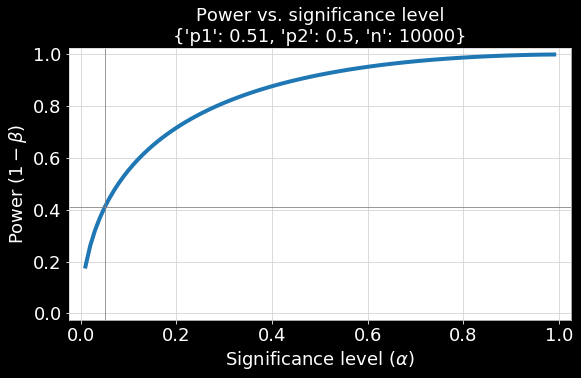

In [ ]:
# The `n` here is the sample size **per group**! Overall N is 2n.
params = dict(p1=0.51, p2=0.50, n=10000)
alphas = np.arange(0.01, 1, 0.01)
df_power_greater = pd.DataFrame([
    pwr_2p(**params, sig_level=alpha, alternative="greater")
    for alpha in alphas
])
ax = df_power_greater.plot(x='sig_level', y='power', figsize=(9, 5), linewidth=4, legend=False)
ax.set_xlabel(r"Significance level $(\alpha)$", fontsize=18)
ax.set_ylabel(r"Power $(1 - \beta)$", fontsize=18)
ax.set_title("Power vs. significance level\n{}".format(params), color='white', fontsize=18)
ax.tick_params(labelsize=18)
ax.axvline(0.05, color='grey', alpha=0.8, linewidth=1)
power_at_05 = df_power_greater.query("sig_level == 0.05")['power'].values[0]
ax.axhline(power_at_05, color='grey', alpha=0.8, linewidth=1)
ax.grid()
ax.set_xlim(-0.025, 1.025)
ax.set_ylim(-0.025, 1.025)

In [ ]:
#df_cost = pd.DataFrame(columns=['Experiment_cost'])
#for a in np.arange(10000, 60000, 10000):
 #  df_cost = df_cost.append({'Experiment_cost': a}, ignore_index=True) 
#df_cost = df_power_greater.assign('experiment_cost' = ['i'])
#df_power = pd.concat([df_power_greater, df_cost], axis=1)
#df_power

In [ ]:
df_cost = pd.DataFrame(columns=['Experiment_cost'])
for i in range(99):
  df_cost = df_cost.append({'Experiment_cost': 1000}, ignore_index=True) 
df_pow = pd.concat([df_power_greater, df_cost], axis=1)
df_pow

,alternative,h,n,p1,p2,power,sig_level,Experiment_cost
0,greater,0.020001,10000,0.51,0.5,0.180874,0.01,1000
1,greater,0.020001,10000,0.51,0.5,0.261268,0.02,1000
2,greater,0.020001,10000,0.51,0.5,0.320434,0.03,1000
3,greater,0.020001,10000,0.51,0.5,0.368293,0.04,1000
4,greater,0.020001,10000,0.51,0.5,0.408834,0.05,1000
5,greater,0.020001,10000,0.51,0.5,0.444146,0.06,1000
6,greater,0.020001,10000,0.51,0.5,0.475487,0.07,1000
7,greater,0.020001,10000,0.51,0.5,0.503685,0.08,1000
8,greater,0.020001,10000,0.51,0.5,0.529317,0.09,1000
9,greater,0.020001,10000,0.51,0.5,0.552807,0.10,1000


In [ ]:
df_cost1 = pd.DataFrame(columns=['Experiment_cost'])
for i in range(99):
  df_cost1 = df_cost1.append({'Experiment_cost': 4000}, ignore_index=True)
df_pow1 = pd.concat([df_power_greater, df_cost1], axis=1)
df_pow1

,alternative,h,n,p1,p2,power,sig_level,Experiment_cost
0,greater,0.020001,10000,0.51,0.5,0.180874,0.01,4000
1,greater,0.020001,10000,0.51,0.5,0.261268,0.02,4000
2,greater,0.020001,10000,0.51,0.5,0.320434,0.03,4000
3,greater,0.020001,10000,0.51,0.5,0.368293,0.04,4000
4,greater,0.020001,10000,0.51,0.5,0.408834,0.05,4000
5,greater,0.020001,10000,0.51,0.5,0.444146,0.06,4000
6,greater,0.020001,10000,0.51,0.5,0.475487,0.07,4000
7,greater,0.020001,10000,0.51,0.5,0.503685,0.08,4000
8,greater,0.020001,10000,0.51,0.5,0.529317,0.09,4000
9,greater,0.020001,10000,0.51,0.5,0.552807,0.10,4000


In [ ]:
df_cost2 = pd.DataFrame(columns=['Experiment_cost'])
for i in range(99):
  df_cost2 = df_cost2.append({'Experiment_cost': 7000}, ignore_index=True)
df_pow2 = pd.concat([df_power_greater, df_cost2], axis=1)

In [ ]:
df_cost3 = pd.DataFrame(columns=['Experiment_cost'])
for i in range(99):
  df_cost3 = df_cost3.append({'Experiment_cost': 10000}, ignore_index=True)
df_pow3 = pd.concat([df_power_greater, df_cost3], axis=1)

In [ ]:
df_resulting = pd.concat([df_pow, df_pow1, df_pow2, df_pow3], axis=0)
df_resulting##########################################

,alternative,h,n,p1,p2,power,sig_level,Experiment_cost
0,greater,0.020001,10000,0.51,0.5,0.180874,0.01,1000
1,greater,0.020001,10000,0.51,0.5,0.261268,0.02,1000
2,greater,0.020001,10000,0.51,0.5,0.320434,0.03,1000
3,greater,0.020001,10000,0.51,0.5,0.368293,0.04,1000
4,greater,0.020001,10000,0.51,0.5,0.408834,0.05,1000
5,greater,0.020001,10000,0.51,0.5,0.444146,0.06,1000
6,greater,0.020001,10000,0.51,0.5,0.475487,0.07,1000
7,greater,0.020001,10000,0.51,0.5,0.503685,0.08,1000
8,greater,0.020001,10000,0.51,0.5,0.529317,0.09,1000
9,greater,0.020001,10000,0.51,0.5,0.552807,0.10,1000


In [ ]:
def eu(sig_level, power, Experiment_cost):
  alpha = sig_level
  p_null_hypo = 0.5  # probability that null hypothesis is true
  u_fp = -1 * (10 ** 6)  # utility of false positive
  u_tp = 1 * (10 ** 5)  # utility of true positive
  # Calculate the utility of doing the experiment.
  # The utility of not doing the experiment is zero.
  u_experiment = u_fp * alpha * p_null_hypo + u_tp * power * (1 - p_null_hypo) - Experiment_cost
  return {'u_experiment': u_experiment, 'alpha': alpha, 'power': power, 'Experiment_cost': Experiment_cost}

df_utility1 = df_pow[['sig_level', 'power', 'Experiment_cost']].apply(lambda row: eu(**row), axis=1, result_type='expand')

In [ ]:
df_utility2 = df_pow1[['sig_level', 'power', 'Experiment_cost']].apply(lambda row: eu(**row), axis=1, result_type='expand')
df_utility3 = df_pow2[['sig_level', 'power', 'Experiment_cost']].apply(lambda row: eu(**row), axis=1, result_type='expand')
df_utility4 = df_pow3[['sig_level', 'power', 'Experiment_cost']].apply(lambda row: eu(**row), axis=1, result_type='expand')

In [ ]:
df_utility = pd.concat([df_utility1, df_utility2, df_utility3, df_utility4], axis=0)

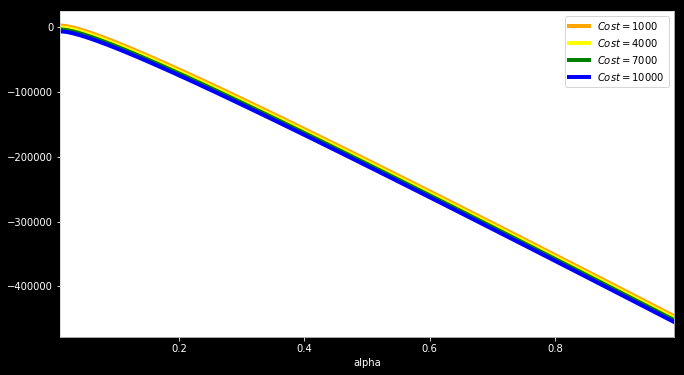

In [ ]:
ax = df_utility1.plot( x='alpha', y='u_experiment', figsize=(11, 6), linewidth=4, label=r"$Cost = 1000$", color='orange')
df_utility2.plot(ax=ax, x='alpha', y='u_experiment', linewidth=4, label=r"$Cost = 4000$", color='yellow')
df_utility3.plot(ax=ax, x='alpha', y='u_experiment', linewidth=4, label=r"$Cost = 7000$", color='green')
df_utility4.plot(ax=ax, x='alpha', y='u_experiment', linewidth=4, label=r"$Cost = 10000$", color='blue')



#ax.set_ylim(None, 10 ** 5)
#ax.set_ylabel("Expected utility of experiment", fontsize=18)
#ax.set_xlabel(r"$\alpha$", fontsize=18)
#ax.tick_params(labelsize=18)

We can see that when the. expected cost = 4000 or less we have some positive values in utility. That is why we are going to run the experiment by adjusting  the expected cost.

In [ ]:
df_power_greater1 = df_power_greater
for i in np.arange(0, 14):
  df_power_greater1 = pd.concat([df_power_greater1, df_power_greater])

In [ ]:
new_index = np.arange(0, 1485)
df_power_greater1.reset_index(drop=True, inplace=True)
df_power_greater1

,alternative,h,n,p1,p2,power,sig_level
0,greater,0.020001,10000,0.51,0.5,0.180874,0.01
1,greater,0.020001,10000,0.51,0.5,0.261268,0.02
2,greater,0.020001,10000,0.51,0.5,0.320434,0.03
3,greater,0.020001,10000,0.51,0.5,0.368293,0.04
4,greater,0.020001,10000,0.51,0.5,0.408834,0.05
5,greater,0.020001,10000,0.51,0.5,0.444146,0.06
6,greater,0.020001,10000,0.51,0.5,0.475487,0.07
7,greater,0.020001,10000,0.51,0.5,0.503685,0.08
8,greater,0.020001,10000,0.51,0.5,0.529317,0.09
9,greater,0.020001,10000,0.51,0.5,0.552807,0.10


In [ ]:
df_cost_adjust = pd.DataFrame(columns=['Experiment_cost'])
for costadj in np.arange(3500, 5000, 100):
  for i in range(99):
    df_cost_adjust = df_cost_adjust.append({'Experiment_cost': costadj}, ignore_index=True) 
df_pow_adjust = pd.concat([df_power_greater1, df_cost_adjust], axis=1)
f_utility_adjust = df_pow_adjust[['sig_level', 'power', 'Experiment_cost']].apply(lambda row: eu(**row), axis=1, result_type='expand')
######################### - done

In [ ]:
mask = f_utility_adjust.loc[f_utility_adjust['u_experiment'] > 0]
mask['Experiment_cost'].max()

4000.0

ANSWER: I rendered cost from 3500 to 5000 with step 100. The positive utility could be find from 3500 to 4000. It means that we could try to find the minimum cost to run the experiment but I suppose to find the maximum cost which we will accept to do the experiment. That is why, to obtain positive utility the maximum acceptable the expected cost is 4000.

##6

**TASK:** Use the experiment parameters from the notes. Suppose we came to believe that there is a smaller chance that the null hypothesis is true. At approximately what P(null hypothesis) would we become willing to do the experiment?

(-0.025, 1.025)

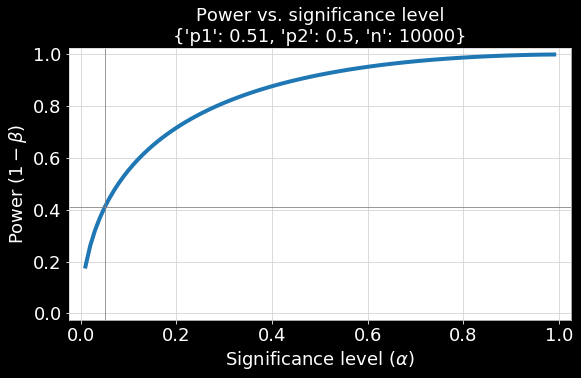

In [ ]:
# The `n` here is the sample size **per group**! Overall N is 2n.
params = dict(p1=0.51, p2=0.50, n=10000)
alphas = np.arange(0.01, 1, 0.01)
df_power_greater = pd.DataFrame([
    pwr_2p(**params, sig_level=alpha, alternative="greater")
    for alpha in alphas
])
ax = df_power_greater.plot(x='sig_level', y='power', figsize=(9, 5), linewidth=4, legend=False)
ax.set_xlabel(r"Significance level $(\alpha)$", fontsize=18)
ax.set_ylabel(r"Power $(1 - \beta)$", fontsize=18)
ax.set_title("Power vs. significance level\n{}".format(params), color='white', fontsize=18)
ax.tick_params(labelsize=18)
ax.axvline(0.05, color='grey', alpha=0.8, linewidth=1)
power_at_05 = df_power_greater.query("sig_level == 0.05")['power'].values[0]
ax.axhline(power_at_05, color='grey', alpha=0.8, linewidth=1)
ax.grid()
ax.set_xlim(-0.025, 1.025)
ax.set_ylim(-0.025, 1.025)

In [ ]:
def eu(sig_level, power, p_null_hypo):
  alpha = sig_level
  experiment_cost = 30000  # fixed cost of experiment
  u_fp = -1 * (10 ** 6)  # utility of false positive
  u_tp = 1 * (10 ** 5)  # utility of true positive
  # Calculate the utility of doing the experiment.
  # The utility of not doing the experiment is zero.
  u_experiment = u_fp * alpha * p_null_hypo + u_tp * power * (1 - p_null_hypo) - experiment_cost
  return {'u_experiment': u_experiment, 'alpha': alpha, 'power': power, 'p_null_hypo': p_null_hypo}

In [ ]:
df_power_greater2 = df_power_greater
for i in np.arange(0, 8):
  df_power_greater2 = pd.concat([df_power_greater2, df_power_greater])

In [ ]:
new_index = np.arange(0, 891)
df_power_greater2.reset_index(drop=True, inplace=True)
df_power_greater2

,alternative,h,n,p1,p2,power,sig_level
0,greater,0.020001,10000,0.51,0.5,0.180874,0.01
1,greater,0.020001,10000,0.51,0.5,0.261268,0.02
2,greater,0.020001,10000,0.51,0.5,0.320434,0.03
3,greater,0.020001,10000,0.51,0.5,0.368293,0.04
4,greater,0.020001,10000,0.51,0.5,0.408834,0.05
5,greater,0.020001,10000,0.51,0.5,0.444146,0.06
6,greater,0.020001,10000,0.51,0.5,0.475487,0.07
7,greater,0.020001,10000,0.51,0.5,0.503685,0.08
8,greater,0.020001,10000,0.51,0.5,0.529317,0.09
9,greater,0.020001,10000,0.51,0.5,0.552807,0.10


In [ ]:
df_p_null_adjust = pd.DataFrame(columns=['p_null_hypo'])
for p_null in np.arange(0.1, 1, 0.1):
  for i in range(99):
    df_p_null_adjust = df_p_null_adjust.append({'p_null_hypo': p_null}, ignore_index=True) 
df_pow_p_null_adjust = pd.concat([df_power_greater2, df_p_null_adjust], axis=1)
f_utility_adjust_p = df_pow_p_null_adjust[['sig_level', 'power', 'p_null_hypo']].apply(lambda row: eu(**row), axis=1, result_type='expand')
######################### - done

In [ ]:
f_utility_adjust_p

,alpha,p_null_hypo,power,u_experiment
0,0.01,0.1,0.180874,-14721.355568
1,0.02,0.1,0.261268,-8485.877695
2,0.03,0.1,0.320434,-4160.946897
3,0.04,0.1,0.368293,-853.644478
4,0.05,0.1,0.408834,1795.046699
5,0.06,0.1,0.444146,3973.141083
6,0.07,0.1,0.475487,5793.848859
7,0.08,0.1,0.503685,7331.622835
8,0.09,0.1,0.529317,8638.520624
9,0.10,0.1,0.552807,9752.624596


In [ ]:
mask_p = f_utility_adjust_p.loc[f_utility_adjust_p['u_experiment'] > 0]
mask_p['p_null_hypo'].max()

0.1

##7

**TASK:** Suppose that we have a more effective version of the new product. If it works, it will boost conversion from 0.50 to 0.52 and deliver an additional 1.2M in revenue (rather than conversion of 0.51 and 1.1M in additional revenue). We also believe it is more likely to be effective, so the probability that the null hypothesis is true is 0.2. Otherwise this scenario is the same as in the notebook. What is the optimal  𝛼  to choose (out of the ones we checked in the notebook)?

(-0.025, 1.025)

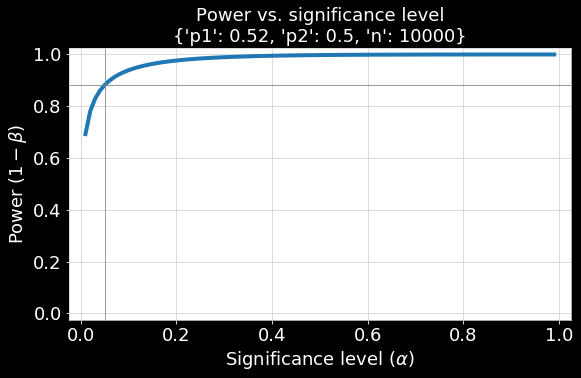

In [ ]:
params = dict(p1=0.52, p2=0.50, n=10000)
alphas = np.arange(0.01, 1, 0.01)
df_power_greater = pd.DataFrame([
    pwr_2p(**params, sig_level=alpha, alternative="greater")
    for alpha in alphas
])
ax = df_power_greater.plot(x='sig_level', y='power', figsize=(9, 5), linewidth=4, legend=False)
ax.set_xlabel(r"Significance level $(\alpha)$", fontsize=18)
ax.set_ylabel(r"Power $(1 - \beta)$", fontsize=18)
ax.set_title("Power vs. significance level\n{}".format(params), color='white', fontsize=18)
ax.tick_params(labelsize=18)
ax.axvline(0.05, color='grey', alpha=0.8, linewidth=1)
power_at_05 = df_power_greater.query("sig_level == 0.05")['power'].values[0]
ax.axhline(power_at_05, color='grey', alpha=0.8, linewidth=1)
ax.grid()
ax.set_xlim(-0.025, 1.025)
ax.set_ylim(-0.025, 1.025)

In [ ]:
def eu(sig_level, power):
  alpha = sig_level
  experiment_cost = 30000  # fixed cost of experiment
  p_null_hypo = 0.2  # probability that null hypothesis is true
  u_fp = -1 * (10 ** 6)  # utility of false positive
  u_tp = 2 * (10 ** 5)  # utility of true positive
  # Calculate the utility of doing the experiment.
  # The utility of not doing the experiment is zero.
  u_experiment = u_fp * alpha * p_null_hypo + u_tp * power * (1 - p_null_hypo) - experiment_cost
  return {'u_experiment': u_experiment, 'alpha': alpha, 'power': power}

df_utility = df_power_greater[['sig_level', 'power']].apply(lambda row: eu(**row), axis=1, result_type='expand')

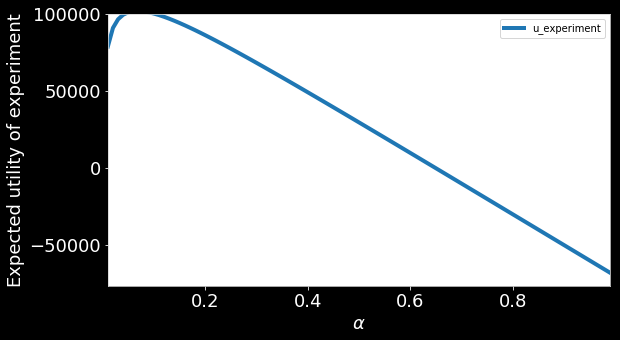

In [ ]:
ax = df_utility.plot(x='alpha', y='u_experiment', figsize=(9, 5), linewidth=4)
ax.set_ylim(None, 10 ** 5)
ax.set_ylabel("Expected utility of experiment", fontsize=18)
ax.set_xlabel(r"$\alpha$", fontsize=18)
ax.tick_params(labelsize=18)

In [ ]:
df_utility['u_experiment'].max()

101925.53703191498

In [ ]:
alpha_opt = df_utility.loc[df_utility['u_experiment'].idxmax()]
alpha_opt

alpha                0.070000
power                0.912035
u_experiment    101925.537032
Name: 6, dtype: float64

ANSWER: alpha                0.070000

##8

**TASK:** In the previous problem, for what ranges of  𝛼  would be willing to run the experiment?

In [ ]:
alpha_opt_range = df_utility.loc[df_utility['u_experiment'] > 0]
alpha_opt_range 

,alpha,power,u_experiment
0,0.01,0.692460,78793.523375
1,0.02,0.780958,90953.292902
2,0.03,0.828534,96565.455223
3,0.04,0.859594,99534.997174
4,0.05,0.881858,101097.349204
5,0.06,0.898741,101798.500408
6,0.07,0.912035,101925.537032
7,0.08,0.922793,101646.837658
8,0.09,0.931681,101068.931868
9,0.10,0.939144,100263.094407


ANSWER: 0.01 to 0.64

#Section "Multiple treatments" (in-class, bonus +20 points)

##8

**TASK:** Get the function stats_prop_test from the lecture 3 notebook. Copy it into your problem set. Adapt it so that you can do a one-sided test. You should only need to change 1 or 2 lines. Do some tests and show that it is giving you answer that makes sense. (Hint: Which of group 1 and group 2 will you treat as the control group?)

In [ ]:
from rpy2.robjects import IntVector, default_converter
from rpy2.robjects.packages import importr
stats = importr('stats')


def stats_prop_test(e1, e2, n1, n2, alternative="greater"):
  x = IntVector([e1, e2])
  ns = [n1, n2]
  n = IntVector(ns)
  n_array = np.array([n1, n2])
  
  # Recommended to not use continuity correction for large sample sizes:
  # https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity
  result = stats.prop_test(x=x, n=n, alternative=alternative, correct=False)
  z = result.rx('statistic')[0][0] ** 0.5
  r_estimate = result.rx('estimate')[0]
  estimates = np.array([r_estimate[0], r_estimate[1]])
  var = np.array(list(map(lambda p: p * (1 - p), estimates)))
  
  se = np.sqrt(np.divide(var, n_array))
  difference = estimates[1] - estimates[0]
  p_value = result.rx('p.value')[0][0]
  return {
      'estimates': estimates,
      'difference': difference,
      'se': se,
      'difference_se': np.sqrt((se ** 2).sum()),
      'z': z, 
      'p_value': p_value
  }

In [ ]:
for i in np.arange(1, 10):
  e1 = 1000 * i 
  e2 = 500 * i
  adapt_func = stats_prop_test(e1, e2, 10000, 10000, alternative="greater")
  print(adapt_func)

{'estimates': array([0.1 , 0.05]), 'difference': -0.05, 'se': array([0.003     , 0.00217945]), 'difference_se': 0.0037080992435478315, 'z': 13.423121104280487, 'p_value': 2.2133484206413707e-41}
{'estimates': array([0.2, 0.1]), 'difference': -0.1, 'se': array([0.004, 0.003]), 'difference_se': 0.005, 'z': 19.802950859533485, 'p_value': 1.403779553662174e-87}
{'estimates': array([0.3 , 0.15]), 'difference': -0.15, 'se': array([0.00458258, 0.00357071]), 'difference_se': 0.0058094750193111245, 'z': 25.4000254000381, 'p_value': 1.2601179119005443e-142}
{'estimates': array([0.4, 0.2]), 'difference': -0.2, 'se': array([0.00489898, 0.004     ]), 'difference_se': 0.006324555320336759, 'z': 30.86066999241838, 'p_value': 2.0144372918029313e-209}
{'estimates': array([0.5 , 0.25]), 'difference': -0.25, 'se': array([0.005     , 0.00433013]), 'difference_se': 0.006614378277661477, 'z': 36.51483716701107, 'p_value': 3.224489618027581e-292}
{'estimates': array([0.6, 0.3]), 'difference': -0.3, 'se': arr

##9

**TASK:** Repeat the analysis in the notebook comparing N=200 vs. N=1000. However, we will change the decision function. Let's consider the first column in each data frame to be the control group. We will pick the arm with the highest conversion rate (in the data) but only if it is statistically significantly better than the "control group". Use your function from problem 8. Plot the performance. How do these results compare to the results in the notebook? Why do you think this is?

In [ ]:
def run_one_study(N=500, k=2):
  # Randomly generate a true conversion probabilities for each arm
  p_rates = np.random.beta(1, 1, size=k)
  # Split the sample evenly among the groups.
  N_per_group = int(N / k)
  # Data: Generate 0/1 conversion events based on the underlying
  # true conversion rates.
  conversion = np.random.binomial(n=1, p=p_rates, size=(N_per_group, k))
  # Return true conversion probabilities and data
  return (p_rates, conversion)

def choose_arm(df):
  # Pick arm that has the highest observed conversion rate in data.
  estimates = df.mean(axis=0)
  pick_arm = estimates.argmax()
  return pick_arm

In [ ]:
def mean_performance(k, N=1000, B=5000):
  # Calculate the average peformance of a study with k arms.
  # Performance is the true underlying conversion probability of
  # the selected arm in the experiment data.
  # We simulate 5000 studies to estimate the average.
  studies = [run_one_study(k=k, N=N) for _ in progressbar(np.arange(B))]
  picks = [choose_arm(study[1]) for study in studies]
  actual_rates = np.vstack([study[0] for study in studies])
  return actual_rates[np.arange(len(actual_rates)), picks].mean()
  

In [ ]:
n_arms = [1, 2, 5, 10, 20, 50, 75, 100]
df = pd.DataFrame([{'mean_performance': mean_performance(k=k), 'k': k} for k in n_arms])

100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


#Decision strategies

What tends to cause null hypothesis significance testing (NHST) to perform worse than flipping a coin?

During NHST, p values are randomly distributed. When there is no treatment, their distribution depends of both the population treatment size and the number of people, who participate in the experiment. It makes impossible to measure treatmnet effect from them. Flipping a coin is independent to that case as when you flip a coin, you do not take into account all external factors.

Is NHST really that bad? When would you want to use it?

Answer: I think the main problem is that when we do NHST we face problems with repeated samples. P values depends on our sample size and it means that we are able to use NHST in high powered experiments (like 0.8+). With low powered experiments deviation of p values is high across repeated samples. 

In the slides I showed you a case where the optimal Bayesian decision strategy has a type I error rate of nearly 100%. Why is that?

ANSWER: I suppose that the optimal Bayesian decision strategy has a type I error rate of nearly 100% due to high values of hyperparameters. Alpha level and power is very high, and optimistic strategy means to have minimum risk, that is why it leads this startegy to have type I error as type I error is related to alpha level. Higher alpha, higher the probability of false positive.